## To do

Want to be able to pint this at a named directory which has the data files for a paramter sweep, as well as paramter dictionries, it should return the data in xarray format, as well as set of unique paramter values that define each model.

Also create a dimensionlized version of the data array. 

In [138]:
import numpy as np
import glob2
import pandas as pd
import xarray as xr

from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
#xarray
#data = xr.DataArray(np.random.randn(2, 3), coords={'x': ['a', 'b']}, dims=('x', 'y'))



In [24]:
#rdir = '/workspace'
rdir = '../'
dat_files = natsort(glob2.glob(rdir + '/results/C/**/*.dat'))


len(dat_files)


54

In [39]:
columns = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

## Parse files to pandas dataframes

In [40]:
data = []
gooddata = []


for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns
        gooddata.append(str(i))
        data.append(df)
        #print(i)
    except:
        pass


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [92]:
len(data), len(gooddata)

(54, 54)

In [41]:
dictionary = dict(zip(gooddata, data))
panel = pd.Panel(dictionary)

## Transform to Xarray

In [97]:
xa = xr.DataArray(panel,dims=('model', 'step', 'metric'), coords={'model': gooddata, 'metric':columns})

In [136]:
#xa.loc['0', :, 'tempintRock'][0:-1]

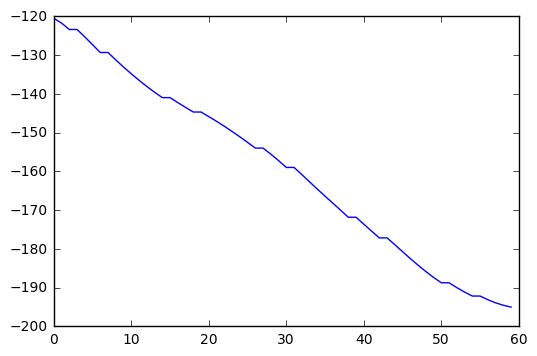

In [137]:
plt.plot(xa.loc['0', :, 'nuTop'][0:-1])

In [90]:
list(xa.coords['metric'].data)
matching = [s for s in list(xa.coords['metric'].data) if "rms" in s]
matching

['rmsintRock', 'rmsintLith', 'rmsintLower', 'rmsSurf']

## Parse parameter Dictionaries for set of unique parameters

In [128]:
dict_files = natsort(glob2.glob(rdir + '/results/C/**/200/dp.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
#newdf = newdf.join(params)

In [132]:
params.columns

Index([u'CVR', u'Edf', u'eta0', u'eta_max', u'fcm'], dtype='object')

In [133]:
del params['CVR']

In [134]:
params

,Edf,eta0,eta_max,fcm
0,63000.0,6.250000e+19,1.000000e+23,0.03
1,63000.0,6.250000e+19,1.000000e+24,0.03
2,63000.0,6.250000e+19,1.000000e+25,0.03
3,63000.0,6.250000e+19,1.000000e+23,0.06
4,63000.0,6.250000e+19,1.000000e+24,0.06
5,63000.0,6.250000e+19,1.000000e+25,0.06
6,63000.0,6.250000e+19,1.000000e+23,0.09
7,63000.0,6.250000e+19,1.000000e+24,0.09
8,63000.0,6.250000e+19,1.000000e+25,0.09
9,63000.0,1.250000e+20,1.000000e+23,0.03
